In [1]:
import pandas as pd
import numpy as np
import re
import collections

In [3]:
f = open("input.txt")
doc1 = f.read()
f.close()

In [4]:
doc1

'John plays football well. He had served as the captain of his college football team. John played tremendously well against the opponent and won for his team. For his contributions, brave John was awarded player of the match.'

In [5]:
l_doc1 = re.sub(r"[^a-zA-Z0-9]", " ", doc1.lower()).split()

In [6]:
l_doc1

['john',
 'plays',
 'football',
 'well',
 'he',
 'had',
 'served',
 'as',
 'the',
 'captain',
 'of',
 'his',
 'college',
 'football',
 'team',
 'john',
 'played',
 'tremendously',
 'well',
 'against',
 'the',
 'opponent',
 'and',
 'won',
 'for',
 'his',
 'team',
 'for',
 'his',
 'contributions',
 'brave',
 'john',
 'was',
 'awarded',
 'player',
 'of',
 'the',
 'match']

In [7]:
l=l_doc1
l

['john',
 'plays',
 'football',
 'well',
 'he',
 'had',
 'served',
 'as',
 'the',
 'captain',
 'of',
 'his',
 'college',
 'football',
 'team',
 'john',
 'played',
 'tremendously',
 'well',
 'against',
 'the',
 'opponent',
 'and',
 'won',
 'for',
 'his',
 'team',
 'for',
 'his',
 'contributions',
 'brave',
 'john',
 'was',
 'awarded',
 'player',
 'of',
 'the',
 'match']

In [8]:
wordset=set(l)

In [9]:
wordset

{'against',
 'and',
 'as',
 'awarded',
 'brave',
 'captain',
 'college',
 'contributions',
 'football',
 'for',
 'had',
 'he',
 'his',
 'john',
 'match',
 'of',
 'opponent',
 'played',
 'player',
 'plays',
 'served',
 'team',
 'the',
 'tremendously',
 'was',
 'well',
 'won'}

In [10]:
def calculateBOW(wordset,l_doc):
  tf_diz = dict.fromkeys(wordset,0)
  for word in l_doc:
      tf_diz[word]=l_doc.count(word)
  return tf_diz

In [11]:
bow1 = calculateBOW(wordset,l_doc1)
df_bow = pd.DataFrame([bow1])
df_bow.head()

,his,as,against,team,played,had,the,college,john,brave,...,and,for,well,captain,was,tremendously,plays,won,football,player
0,3,1,1,2,1,1,3,1,3,1,...,1,2,2,1,1,1,1,1,2,1


In [12]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()

In [13]:
X = vectorizer.fit_transform([doc1])
df_bow_sklearn = pd.DataFrame(X.toarray(),columns=vectorizer.get_feature_names_out())
df_bow_sklearn.head()

,against,and,as,awarded,brave,captain,college,contributions,football,for,...,played,player,plays,served,team,the,tremendously,was,well,won
0,1,1,1,1,1,1,1,1,2,2,...,1,1,1,1,2,3,1,1,2,1


In [14]:
print(vectorizer.get_feature_names_out())

['against' 'and' 'as' 'awarded' 'brave' 'captain' 'college'
 'contributions' 'football' 'for' 'had' 'he' 'his' 'john' 'match' 'of'
 'opponent' 'played' 'player' 'plays' 'served' 'team' 'the' 'tremendously'
 'was' 'well' 'won']


In [15]:
import nltk
nltk.download('punkt')
import re
import numpy as np

f= open("input.txt")
text=f.read()
f.close()
dataset = nltk.sent_tokenize(text)
for i in range(len(dataset)):
    dataset[i] = dataset[i].lower()
    dataset[i] = re.sub(r'\W', ' ', dataset[i])
    dataset[i] = re.sub(r'\s+', ' ', dataset[i])

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\yasha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [16]:
print(dataset)

['john plays football well ', 'he had served as the captain of his college football team ', 'john played tremendously well against the opponent and won for his team ', 'for his contributions brave john was awarded player of the match ']


In [17]:
word2count = {}
for data in dataset:
    words = nltk.word_tokenize(data)
    for word in words:
        if word not in word2count.keys():
            word2count[word] = 1
        else:
            word2count[word] += 1

In [18]:
word2count

{'john': 3,
 'plays': 1,
 'football': 2,
 'well': 2,
 'he': 1,
 'had': 1,
 'served': 1,
 'as': 1,
 'the': 3,
 'captain': 1,
 'of': 2,
 'his': 3,
 'college': 1,
 'team': 2,
 'played': 1,
 'tremendously': 1,
 'against': 1,
 'opponent': 1,
 'and': 1,
 'won': 1,
 'for': 2,
 'contributions': 1,
 'brave': 1,
 'was': 1,
 'awarded': 1,
 'player': 1,
 'match': 1}

In [19]:
words

['for',
 'his',
 'contributions',
 'brave',
 'john',
 'was',
 'awarded',
 'player',
 'of',
 'the',
 'match']

In [20]:
len(words)

11

In [21]:
vocab_size = len(wordset)
embed_dim = 10
context_size = 4

In [22]:
word_to_ix = {word: i for i, word in enumerate(wordset)}
ix_to_word = {i: word for i, word in enumerate(wordset)}

In [23]:
word_to_ix

{'his': 0,
 'as': 1,
 'against': 2,
 'team': 3,
 'played': 4,
 'had': 5,
 'the': 6,
 'college': 7,
 'john': 8,
 'brave': 9,
 'served': 10,
 'he': 11,
 'contributions': 12,
 'awarded': 13,
 'opponent': 14,
 'match': 15,
 'of': 16,
 'and': 17,
 'for': 18,
 'well': 19,
 'captain': 20,
 'was': 21,
 'tremendously': 22,
 'plays': 23,
 'won': 24,
 'football': 25,
 'player': 26}

In [24]:
data = []
for i in range(2, len(words) - 2):
    context = [words[i - 2], words[i - 1], words[i + 1], words[i + 2]]
    target = words[i]
    data.append((context, target))
print(data[:5])

[(['for', 'his', 'brave', 'john'], 'contributions'), (['his', 'contributions', 'john', 'was'], 'brave'), (['contributions', 'brave', 'was', 'awarded'], 'john'), (['brave', 'john', 'awarded', 'player'], 'was'), (['john', 'was', 'player', 'of'], 'awarded')]


In [25]:
embeddings =  np.random.random_sample((vocab_size, embed_dim))

In [26]:
embeddings

array([[0.17033398, 0.91986093, 0.83953578, 0.06797961, 0.48473037,
        0.47596944, 0.14870094, 0.39015982, 0.42297284, 0.3226933 ],
       [0.49855046, 0.23823329, 0.383818  , 0.30321332, 0.66550524,
        0.581881  , 0.51543907, 0.55675074, 0.04901878, 0.41026272],
       [0.74846563, 0.52855279, 0.81780921, 0.33661892, 0.94488593,
        0.55107791, 0.17787764, 0.66549122, 0.48838948, 0.960339  ],
       [0.63218623, 0.50638891, 0.09452121, 0.89065924, 0.80954446,
        0.52712436, 0.67616779, 0.40123736, 0.21805776, 0.31404004],
       [0.94082207, 0.30321731, 0.3626291 , 0.54639642, 0.51453183,
        0.89589492, 0.80547827, 0.37583202, 0.64650709, 0.7798444 ],
       [0.62172527, 0.120757  , 0.84162222, 0.41030488, 0.44945943,
        0.78891073, 0.4129327 , 0.3997842 , 0.3214617 , 0.4967209 ],
       [0.910486  , 0.55065526, 0.162773  , 0.43762947, 0.96217837,
        0.38203622, 0.0760282 , 0.97971154, 0.08701914, 0.34190849],
       [0.39114041, 0.05661239, 0.6429267

In [27]:
def linear(m, theta):
    w = theta
    return m.dot(w)

In [28]:
def log_softmax(x):
    e_x = np.exp(x - np.max(x))
    return np.log(e_x / e_x.sum())
def NLLLoss(logs, targets):
    out = logs[range(len(targets)), targets]
    return -out.sum()/len(out)

In [29]:
import tensorflow as tf
import keras.backend as k
from keras.models import Sequential
from keras.layers import Dense, Embedding, Lambda

In [30]:
def log_softmax_crossentropy_with_logits(logits,target):

    out = np.zeros_like(logits)
    out[np.arange(len(logits)),target] = 1

    softmax = np.exp(logits) / np.exp(logits).sum(axis=-1,keepdims=True)

    return (- out + softmax) / logits.shape[0]

In [31]:
def forward(context_idxs, theta):
    m = embeddings[context_idxs].reshape(1, -1)
    n = linear(m, theta)
    o = log_softmax(n)

    return m, n, o

In [32]:
def backward(preds, theta, target_idxs):
    m, n, o = preds

    dlog = log_softmax_crossentropy_with_logits(n, target_idxs)
    dw = m.T.dot(dlog)

    return dw

In [33]:
def optimize(theta, grad, lr=0.03):
    theta -= grad * lr
    return theta

In [34]:
theta = np.random.uniform(-1, 1, ( context_size * embed_dim, vocab_size))

In [35]:
epoch_losses = {}

for epoch in range(80):

    losses =  []

    for context, target in data:
        context_idxs = np.array([word_to_ix[w] for w in context])
        preds = forward(context_idxs, theta)

        target_idxs = np.array([word_to_ix[target]])
        loss = NLLLoss(preds[-1], target_idxs)

        losses.append(loss)

        grad = backward(preds, theta, target_idxs)
        theta = optimize(theta, grad, lr=0.03)

        epoch_losses[epoch] = losses

Text(0, 0.5, 'Losses')

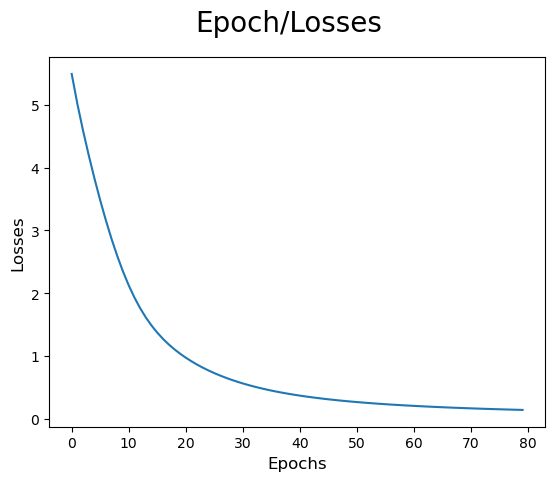

In [36]:
import matplotlib.pyplot as plt
ix = np.arange(0,80)

fig = plt.figure()
fig.suptitle('Epoch/Losses', fontsize=20)
plt.plot(ix,[epoch_losses[i][0] for i in ix])
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Losses', fontsize=12)

In [37]:
def predict(words):
    context_idxs = np.array([word_to_ix[w] for w in words])
    preds = forward(context_idxs, theta)
    word = ix_to_word[np.argmax(preds[-1])]

    return word
predict(['brave', 'john', 'awarded','player'])

'was'

In [38]:
def accuracy():
    wrong = 0

    for context, target in data:
        if(predict(context) != target):
            wrong += 1

    return (1 - (wrong / len(data)))
accuracy()

1.0